In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("weatherAUS.csv")


In [3]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [4]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
numeric_columns=list(np.where((x.dtypes==np.int64) | (x.dtypes==np.float64))[0])
imp_mean.fit(x.iloc[:,numeric_columns])
x.iloc[:,numeric_columns]=imp_mean.transform(x.iloc[:,numeric_columns]) 
string_columns=list(np.where((x.dtypes!=np.int64) | (x.dtypes!=np.float64))[0])
imp_mean=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imp_mean.fit(x.iloc[:,string_columns])
x.iloc[:,string_columns]=imp_mean.transform(x.iloc[:,string_columns])

In [5]:
def OneHotEncoderMethod(indices,data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),indices)],remainder='passthrough')
    return columnTransformer.fit_transform(data)


In [6]:
#def LabelEncoderMethod(series):
   # from sklearn import preprocessing
   # le=preprocessing.LabelEncoder()
   # return le.fit_transform(series)

In [7]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    le=preprocessing.LabelEncoder()
    le.fit(series)
    return le.transform(series)

In [8]:
#encoding selection

In [9]:
string_cols  = list(np.where((x.dtypes == np.object))[0])

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7576\473694297.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  string_cols  = list(np.where((x.dtypes == np.object))[0])


In [10]:
string_cols


[0, 1, 7, 9, 10, 21]

In [11]:
#labelEncoding

In [12]:
y=LabelEncoderMethod(y)

In [13]:
  len(pd.unique(x[x.columns[0]]))

3436

In [14]:
col_0=x.columns[0]

In [15]:
col_0


'Date'

In [16]:
x[col_0]=LabelEncoderMethod(x[col_0])

In [17]:
x.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,396,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No
1,397,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No
2,398,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No
3,399,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No
4,400,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No


In [18]:
def EncodingSelection(x,threshold=10):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    string_cols = list(np.where((x.dtypes == np.object))[0])
    one_hot_encoding_indices = []
    for col in string_cols:
        length = len(pd.unique(x[x.columns[col]]))
        if length == 2 or length > threshold:
            x[x.columns[col]]=LabelEncoderMethod(x[x.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
       
    x=OneHotEncoderMethod(one_hot_encoding_indices,x)
    return x
            
        

In [19]:
 x=EncodingSelection(x,10)
    

C:\Users\KIIT\AppData\Local\Temp\ipykernel_7576\2598887645.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  string_cols = list(np.where((x.dtypes == np.object))[0])


In [20]:
x.shape

(145460, 22)

In [21]:
#feature selection

In [22]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2


In [23]:
kbest = SelectKBest(score_func=chi2,k=10)
mms = preprocessing.MinMaxScaler()

In [24]:
x_temp=mms.fit_transform(x)

In [25]:
x_temp=kbest.fit(x_temp,y)

In [26]:
x_temp.scores_

array([1.50514566e+01, 1.58175252e+01, 4.67783039e+01, 1.22836318e+02,
       6.47157312e+02, 1.44422848e+01, 1.03352623e+03, 1.36011637e+02,
       2.87006856e+02, 3.53677471e+01, 2.91689528e+01, 5.58462514e+01,
       5.26833693e+01, 4.82960487e+02, 2.25219988e+03, 1.57728585e+02,
       1.22708551e+02, 1.19373660e+03, 1.41579509e+03, 3.45236543e+00,
       1.72316599e+02, 1.06248786e+04])

In [27]:
for i in np.sort(x_temp.scores_):
    print('{0:.10f}'.format(i))

3.4523654257
14.4422848064
15.0514565951
15.8175251532
29.1689527570
35.3677471243
46.7783038988
52.6833693451
55.8462514403
122.7085513091
122.8363180739
136.0116369921
157.7285852884
172.3165992609
287.0068557768
482.9604872103
647.1573120166
1033.5262335295
1193.7366038538
1415.7950926455
2252.1998838441
10624.8785997130


In [28]:
best_features=np.argsort(x_temp.scores_)[-13:]

In [29]:
best_features

array([16,  3,  7, 15, 20,  8, 13,  4,  6, 17, 18, 14, 21], dtype=int64)

In [30]:
features_to_delete=np.argsort(x_temp.scores_)[:12]

In [31]:
features_to_delete

array([19,  5,  0,  1, 10,  9,  2, 12, 11, 16,  3,  7], dtype=int64)

In [32]:
x=np.delete(x,features_to_delete,axis=1)

In [33]:
x.shape

(145460, 10)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
sc=preprocessing.StandardScaler(with_mean=False)
sc.fit(x_train)
x_train=sc.transform(x_train)
sc.fit(x_test)
x_test=sc.transform(x_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knnClassifier=KNeighborsClassifier(n_neighbors=3)

In [38]:
knnClassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred=knnClassifier.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_pred,y_test)

0.8033136257390348

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
len(y_pred)

29092

In [44]:
x_test.shape

(29092, 10)

In [45]:
x_test[0]

array([  1.98003852,   2.80252586,   2.35325132,   3.85295773,
         2.18654507, 151.13343001,   1.95886491,   2.1524826 ,
         4.25931271,   2.41486839])

In [46]:
knnClassifier.predict([x_test[0]])

array([0])

In [47]:
knnClassifier.predict_proba([x_test[0]])

array([[1., 0., 0.]])

In [48]:
from sklearn.linear_model import LogisticRegression
LRM=LogisticRegression(random_state=0,max_iter=200)
LRM.fit(x_train,y_train)
y_pred=LRM.predict(x_test)
accuracy_score(y_pred,y_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8198817544342087

In [49]:
from sklearn.naive_bayes import GaussianNB
model_GNB=GaussianNB()
model_GNB.fit(x_train,y_train)
y_pred=model_GNB.predict(x_test)
accuracy_score(y_pred,y_test)

0.7887735459920253

In [50]:
from sklearn.svm import SVC

model_SVC=SVC()
model_SVC.fit(x_train,y_train)
y_pred=model_SVC.predict(x_test)
accuracy_score(y_pred,y_test)

0.8150350611852055

In [51]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [52]:
#decisions regions visualization code

def visualize_decision_regions(x,y,model):
    from mlxtend.plotting import plot_decision_regions
    import matplotlib.pyplot as plt
    #plotting decisions regions
    plot_decision_regions(x,y,clf=model)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [71]:
from sklearn import datasets 
iris=datasets.load_iris()
x=iris.data[:, :2]
y=iris.target

KNN_V=KNeighborsClassifier(n_neighbors=3)
KNN_V.fit(x,y)

LRM=LogisticRegression(random_state=0,max_iter=200)
LRM.fit(x,y)

GNB_V=GaussianNB()
GNB_V.fit(x,y)

SVC_V=SVC()
SVC_V.fit(x,y)

DTC_V=DecisionTreeClassifier()
DTC_V.fit(x,y)

RFC_V=DecisionTreeClassifier()
RFC_V.fit(x,y)

ADA_V=DecisionTreeClassifier()
ADA_V.fit(x,y)

xgb_V=DecisionTreeClassifier()
xgb_V.fit(x,y)


DecisionTreeClassifier()

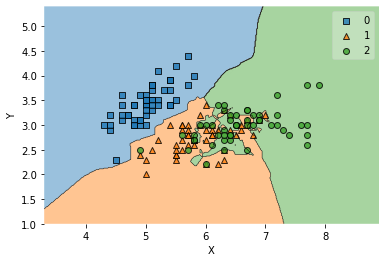

In [54]:
visualize_decision_regions(x,y,KNN_V)

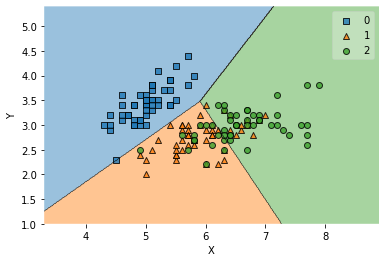

In [55]:
visualize_decision_regions(x,y,LRM)

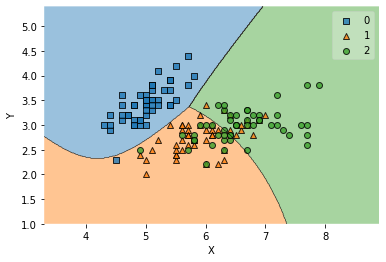

In [56]:
visualize_decision_regions(x,y,GNB_V)

In [57]:
#decision tree model on classification

In [58]:
from sklearn.tree import DecisionTreeClassifier

model_DTC=DecisionTreeClassifier()
model_DTC.fit(x_train,y_train)
y_pred=model_DTC.predict(x_test)
accuracy_score(y_pred,y_test)

0.7391035336174894

In [59]:
from sklearn.ensemble import RandomForestClassifier

model_RFC= RandomForestClassifier(n_estimators=500,max_depth=5)
model_RFC.fit(x_train,y_train)
y_pred=model_RFC.predict(x_test)
accuracy_score(y_pred,y_test)

0.8214285714285714

In [61]:
from sklearn.ensemble import AdaBoostClassifier

model_ABC= AdaBoostClassifier()
model_ABC.fit(x_train,y_train)
y_pred=model_ABC.predict(x_test)
accuracy_score(y_pred,y_test)

0.8189880379485769

In [62]:
import xgboost as xgb
model_xgb= xgb.XGBClassifier()
model_xgb.fit(x_train,y_train)
y_pred=model_xgb.predict(x_test)
accuracy_score(y_pred,y_test)

0.8297813831981301

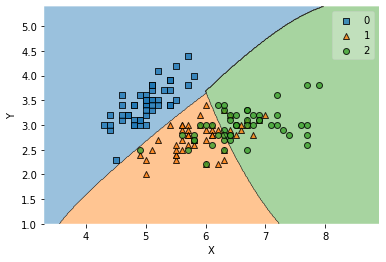

In [66]:
visualize_decision_regions(x,y,SVC_V)

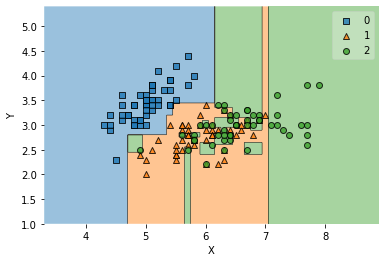

In [67]:
visualize_decision_regions(x,y,ADA_V)

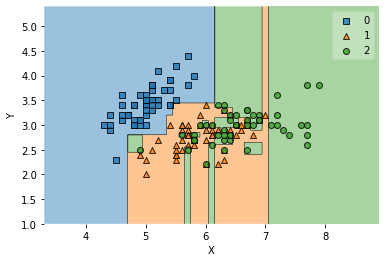

In [72]:
visualize_decision_regions(x,y,xgb_V)

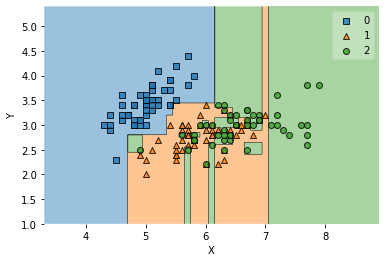

In [73]:
visualize_decision_regions(x,y,DTC_V)

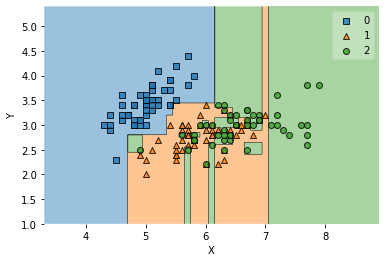

In [74]:
visualize_decision_regions(x,y,RFC_V)